In [20]:
#Import datasets
import pandas as pd 

#grafting/ acrage table
graft_df = pd.read_csv("graft.csv")

#production table
prod_df = pd.read_csv("production.csv")


In [21]:
#merge graft and production datasets 
df = prod_df.merge(graft_df)

#Make prod_wk datetime
df['prod_wk'] = pd.to_datetime(df['prod_wk'])

#Remove unneeded columns 
df = df.drop(['prod_date_cnt', 'prod_wk_no', 'min_date','max_date' ], axis=1)

In [22]:
#data cleaning
boxes = df['var_boxes']
acres = df['acres']

one_hot = pd.get_dummies(df['variety_desc'])

# Concatenate the one-hot encoded column with the original dataframe
df = pd.concat([df, one_hot], axis=1)

#create a new column for production yield (boxes per acre)
df['yield'] = boxes/acres 

#create a new column for age of the variety 
prod_yr = df['prod_yr'] 
graft_year = df['year_planted_grafted'] 
df['age'] = prod_yr - graft_year

#create a new column for yield classification: 
# High(2) : yield > 170  | Medium(1) : 170 > yield > 55   | Low(0) : yield < 55 
df['yield_class'] = df['yield'].apply(lambda x: 'high' if x > 175 else ('medium' if x >= 55  else 'low'))

df

,prod_wk,ranch_no,ranch_sub,var_cd,variety_desc,var_boxes,color,prod_yr,grafted,acres,...,IVORY - SHEEGENE 21,RED GLOBE,SCARLET ROYAL,SUGRAONE,SWEET GLOBE,SWEET SCARLET,THOMPSON SEEDLESS,yield,age,yield_class
0,2015-07-13,1,NaN,178,ARRA 15 - SWEETIES,3905,GREEN,2015,True,36.00,...,0,0,0,0,0,0,0,108.472222,6,medium
1,2015-07-20,1,NaN,178,ARRA 15 - SWEETIES,1075,GREEN,2015,True,36.00,...,0,0,0,0,0,0,0,29.861111,6,low
2,2015-07-27,1,NaN,178,ARRA 15 - SWEETIES,2047,GREEN,2015,True,36.00,...,0,0,0,0,0,0,0,56.861111,6,medium
3,2015-08-03,1,NaN,178,ARRA 15 - SWEETIES,6121,GREEN,2015,True,36.00,...,0,0,0,0,0,0,0,170.027778,6,medium
4,2015-08-10,1,NaN,178,ARRA 15 - SWEETIES,724,GREEN,2015,True,36.00,...,0,0,0,0,0,0,0,20.111111,6,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,2022-08-08,50,NaN,307,IVORY - SHEEGENE 21,11359,GREEN,2022,True,200.06,...,1,0,0,0,0,0,0,56.777967,1,medium
3635,2022-08-15,50,NaN,307,IVORY - SHEEGENE 21,2189,GREEN,2022,False,27.70,...,1,0,0,0,0,0,0,79.025271,4,medium
3636,2022-08-15,50,NaN,307,IVORY - SHEEGENE 21,2189,GREEN,2022,False,71.12,...,1,0,0,0,0,0,0,30.778965,3,low
3637,2022-08-15,50,NaN,307,IVORY - SHEEGENE 21,2189,GREEN,2022,True,185.48,...,1,0,0,0,0,0,0,11.801812,2,low


In [23]:
#yields = df['yield']
#yields.to_csv('yield_labels.csv', index=False)

In [24]:
num_high_yield = (df['yield_class'] == 'high').sum()
print(f"There are {num_high_yield} high yield values.")

num_med_yield = (df['yield_class'] == 'medium').sum()
print(f"There are {num_med_yield} medium yield values.")

num_low_yield = (df['yield_class'] == 'low').sum()
print(f"There are {num_low_yield} low yield values.")

There are 671 high yield values.
There are 1310 medium yield values.
There are 1658 low yield values.


In [25]:
#rename
df = df.rename(columns={'prod_wk': 'date'})
# Extract datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop('date', axis=1)

def get_season(month):
    if month >= 3 and month <= 5:
        out = 'spring'
    elif month >= 6 and month <= 8:
        out = 'summer'
    elif month >= 9 and month <= 11:
        out = 'autumn'
    elif month == 12 or (month >= 1 and month <= 2):
        out = 'winter'
    else:
        out = np.nan
    return out

df['prod_season'] = df['month'].apply(get_season)

# one hot encode season
one_hot = pd.get_dummies(df['prod_season'])
df = pd.concat([df, one_hot], axis=1)
df = df.drop('prod_season', axis=1)

df.shape

(3639, 51)

In [26]:
df['color_code'] = pd.factorize(df['color'])[0]
df.head()
print(df['color'].unique())
print(df['color_code'].unique())
#GREEN  = 0 
#RED = 1
#BLACK = 2 
#NAN = -1
one_hot = pd.get_dummies(df['color'], prefix='color')
df = pd.concat([df, one_hot], axis=1)

one_hot2 = pd.get_dummies(df['ranch_no'], prefix = 'ranch')
df = pd.concat([df, one_hot2], axis=1)



['GREEN' 'RED' 'BLACK' nan]
[ 0  1  2 -1]


In [27]:
import numpy as np 



df2 = df.drop(['ranch_no','ranch_sub', 'prod_yr', 'color', 'yield', 'acres', 'variety_desc', 'color_code', 'var_cd', 
               'var_boxes'], axis=1)
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.dropna()
yield_class = df2['yield_class']
df2 = df2.drop(['yield_class'], axis = 1)

from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X, y = df2, yield_class

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy and f1
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print('F1 score:', f1)



Accuracy: 0.6071428571428571
F1 score: 0.5896086129617316


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\hulk5\miniconda3\envs\neural\lib\site-packages\sklearn\metrics\__init__.py)

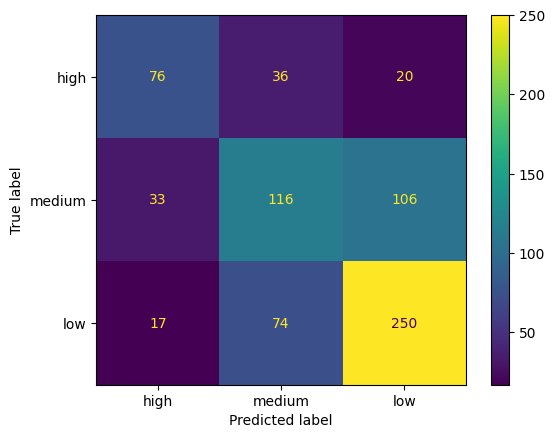

341


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

labels = ['high', 'medium', 'low']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

print(y_test[y_test == 'low'].size)

In [30]:
df2.shape

(3639, 67)

In [31]:
#import weather and precipitation dataset
temps_df = pd.read_csv("temps.csv")

#drop unneeded columns 
temps_df = temps_df.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)

# convert the 'Date' column to datetime format
temps_df['Date'] = pd.to_datetime(temps_df['Date'])

# set the 'Date' column as the index
temps_df.set_index('Date', inplace=True)

# resample the data by week and calculate the mean of 'Daily_High'
weekly_avg = temps_df['Daily_High'].resample('W').mean()

#Make weekly_avg into a dataframe
weekly_avg = pd.DataFrame(weekly_avg)

#Add weekly_low_avg to weekly_avg
weekly_avg['weekly_low_avg'] =  temps_df['Daily _Low'].resample('W').mean()
#Add weekly_precipitation_avg to weekly_avg
weekly_avg['weekly_precipitation_avg'] =  temps_df['Precipitation '].resample('W').mean()
#Rename 'Daily_High' to 'weekly_high_avg'
weekly_avg = weekly_avg.rename(columns={'Daily_High': 'weekly_high_avg'})

temps_df.head()

,Daily_High,Daily _Low,Precipitation
Date,,,
2015-01-01,54,28,0.0
2015-01-02,54,30,0.0
2015-01-03,55,31,0.0
2015-01-04,58,31,0.0
2015-01-05,59,33,0.0


In [32]:
temps_df.reset_index(inplace=True) 
temps_df['year'] = temps_df['Date'].dt.year
temps_df['month'] = temps_df['Date'].dt.month
temps_df['day'] = temps_df['Date'].dt.day
temps_df = temps_df.drop(['Date'], axis=1)
temps_df

,Daily_High,Daily _Low,Precipitation,year,month,day
0,54,28,0.00,2015,1,1
1,54,30,0.00,2015,1,2
2,55,31,0.00,2015,1,3
3,58,31,0.00,2015,1,4
4,59,33,0.00,2015,1,5
...,...,...,...,...,...,...
2904,56,43,0.83,2022,12,27
2905,58,47,0.02,2022,12,28
2906,55,47,0.03,2022,12,29
2907,66,51,0.00,2022,12,30


In [33]:
merged_df = pd.merge(df2, temps_df, on=['year', 'month', 'day'], how='inner')
merged_df

,grafted,year_planted_grafted,ALLISON - SHEEGENE 20,ARD 35 - FIRE CRUNCH,ARD 36 - CHERRY CRUSH,ARD 39 - SUNNY POP,ARRA 15 - SWEETIES,ARRA 16,ARRA 27 - ARRA MYSTIC STAR,ARRA 28 - ARRA PASSION PUNCH,...,ranch_32,ranch_33,ranch_34,ranch_35,ranch_36,ranch_37,ranch_50,Daily_High,Daily _Low,Precipitation
0,True,2009,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
1,True,2017,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,94,68,0.0
2,True,2018,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,94,68,0.0
3,True,2006,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
4,True,2011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,False,2010,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,74,39,0.0
3632,False,2012,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,74,39,0.0
3633,True,2017,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,74,39,0.0
3634,False,2009,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,93,65,0.0


In [34]:
df2 = df.drop(['ranch_sub', 'prod_yr', 'color', 'yield', 'color_code','variety_desc', 'ranch_no', 'acres', 'var_cd',
               'var_boxes', 'summer', 'autumn', 'winter'], axis=1)
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.dropna()
merged_df = pd.merge(df2, temps_df, on=['year', 'month', 'day'], how='inner')
yield_class = merged_df['yield_class']
merged_df = merged_df.drop(['yield_class'], axis = 1)


X, y = merged_df, yield_class

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
merged_df

Accuracy: 0.5975274725274725


,grafted,year_planted_grafted,ALLISON - SHEEGENE 20,ARD 35 - FIRE CRUNCH,ARD 36 - CHERRY CRUSH,ARD 39 - SUNNY POP,ARRA 15 - SWEETIES,ARRA 16,ARRA 27 - ARRA MYSTIC STAR,ARRA 28 - ARRA PASSION PUNCH,...,ranch_32,ranch_33,ranch_34,ranch_35,ranch_36,ranch_37,ranch_50,Daily_High,Daily _Low,Precipitation
0,True,2009,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
1,True,2017,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,94,68,0.0
2,True,2018,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,94,68,0.0
3,True,2006,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
4,True,2011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,False,2010,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,74,39,0.0
3632,False,2012,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,74,39,0.0
3633,True,2017,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,74,39,0.0
3634,False,2009,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,93,65,0.0


In [35]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

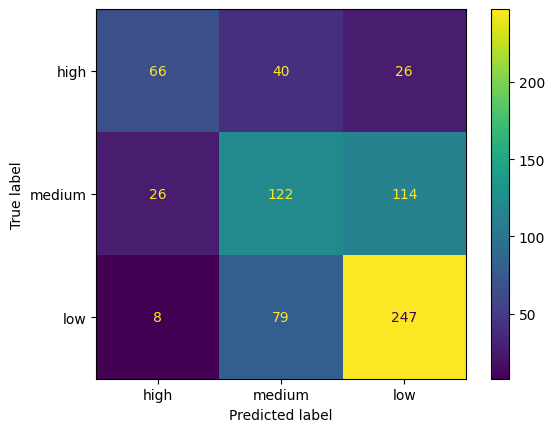

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

In [37]:
print([i for i in merged_df.columns])

['grafted', 'year_planted_grafted', 'ALLISON - SHEEGENE 20', 'ARD 35 - FIRE CRUNCH', 'ARD 36 - CHERRY CRUSH', 'ARD 39 - SUNNY POP', 'ARRA 15 - SWEETIES', 'ARRA 16', 'ARRA 27 - ARRA MYSTIC STAR', 'ARRA 28 - ARRA PASSION PUNCH', 'ARRA 29 - ARRA PASSION FIRE', 'ARRA 30 - SUGAR DROP', 'ARRA 32 - ARRA MYSTIC DREAM', 'ARRA 33 - HONEY POP', 'ARRA 34 - YUM-BO', 'ARRA11 - HONEY BLOSSOM', 'AUTUMN KING', 'AUTUMN ROYAL', 'CANDY HEARTS', 'CRIMSON SEEDLESS', 'EARLY SWEET', 'EXP 24A-15+3', 'EXP 7A-40+1', 'EXPERIMENTAL', 'EXPERIMENTAL 80B-30+9', 'EXPERIMENTAL 95B-59+6', 'FLAME SEEDLESS', 'IVORY - SHEEGENE 21', 'RED GLOBE', 'SCARLET ROYAL', 'SUGRAONE', 'SWEET GLOBE', 'SWEET SCARLET', 'THOMPSON SEEDLESS', 'age', 'year', 'month', 'day', 'color_BLACK', 'color_GREEN', 'color_RED', 'ranch_1', 'ranch_2', 'ranch_3', 'ranch_4', 'ranch_10', 'ranch_12', 'ranch_14', 'ranch_15', 'ranch_16', 'ranch_17', 'ranch_18', 'ranch_19', 'ranch_20', 'ranch_29', 'ranch_30', 'ranch_31', 'ranch_32', 'ranch_33', 'ranch_34', 'ranc

In [38]:
two_class = yield_class.apply(lambda x: 'low' if x != 'high' else 'high')
two_class_gb = yield_class.apply(lambda x: 'good' if x != 'low' else 'bad')

merged_df.to_csv('full_features.csv', index=False)
yield_class.to_csv('multiclass_labels.csv', index=False)
two_class.to_csv('binaryclass_labels.csv', index=False)
two_class_gb.to_csv('binaryclass_labels_low.csv', index=False)

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", acc)
print('F1 score:', f1)